In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [5]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
train.columns

Index([u'ID', u'Datetime', u'Count'], dtype='object')

In [8]:
test.columns

Index([u'ID', u'Datetime'], dtype='object')

In [9]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [10]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [11]:
train.shape

(18288, 3)

In [12]:
test.shape

(5112, 2)

In [13]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [14]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [15]:
train.tail()

,ID,Datetime,Count
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580
18287,18287,2014-09-25 23:00:00,534


In [16]:
train['Datetime'].head().dt.year

0    2012
1    2012
2    2012
3    2012
4    2012
Name: Datetime, dtype: int64

In [17]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [18]:
train['Hour'].tail()

18283    19
18284    20
18285    21
18286    22
18287    23
Name: Hour, dtype: int64

In [19]:
train['dayOfWeek'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [20]:
train['dayOfWeek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayOfWeek, dtype: int64

In [21]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [22]:
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [23]:
train['weekend'][:20]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: weekend, dtype: int64

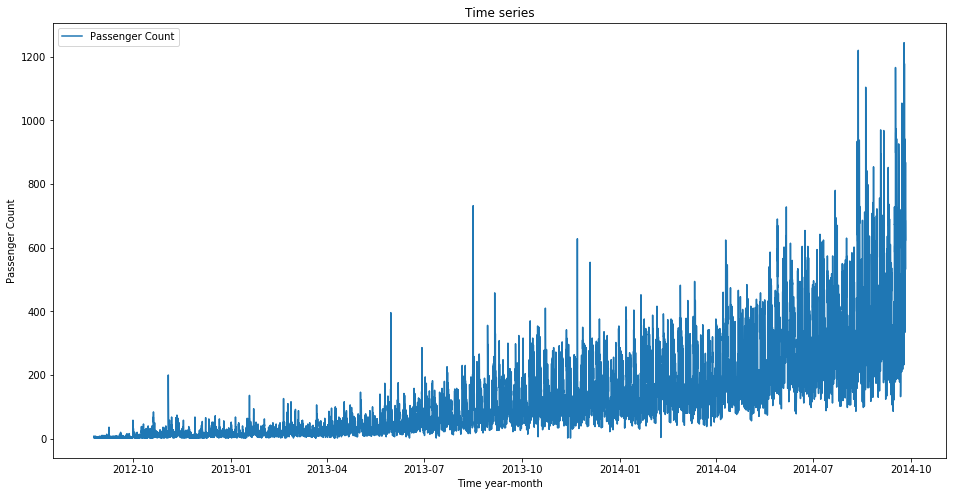

In [24]:
plt.figure(figsize=(16,8))
df = train.drop('ID', 1)
plt.plot(df['Datetime'], df['Count'], label = "Passenger Count")
plt.title("Time series")
plt.xlabel("Time year-month")
plt.ylabel("Passenger Count")
plt.legend(loc = "best")

In [25]:
df['Datetime'][0:7]

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
5   2012-08-25 05:00:00
6   2012-08-25 06:00:00
Name: Datetime, dtype: datetime64[ns]

In [26]:
df.head()

,Datetime,Count,year,month,day,Hour,dayOfWeek,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


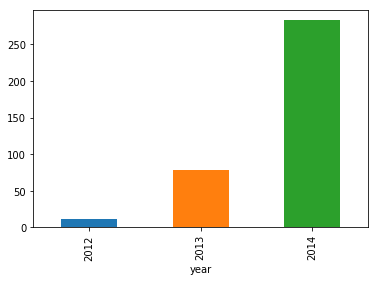

In [27]:
train.groupby('year')['Count'].mean().plot.bar()

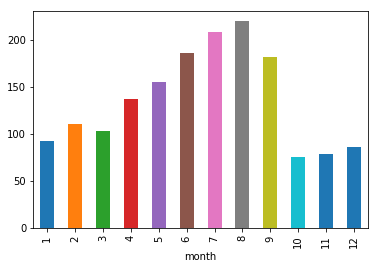

In [28]:
train.groupby('month')['Count'].mean().plot.bar()

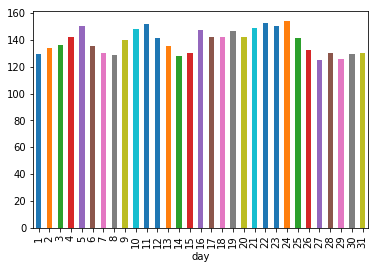

In [29]:
train.groupby('day')['Count'].mean().plot.bar()

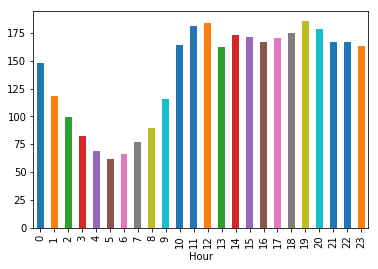

In [30]:
train.groupby('Hour')['Count'].mean().plot.bar()

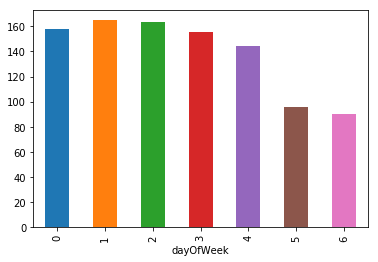

In [31]:
train.groupby('dayOfWeek')['Count'].mean().plot.bar()

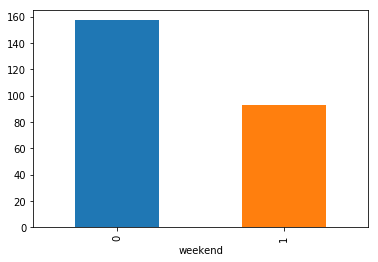

In [32]:
train.groupby('weekend')['Count'].mean().plot.bar()

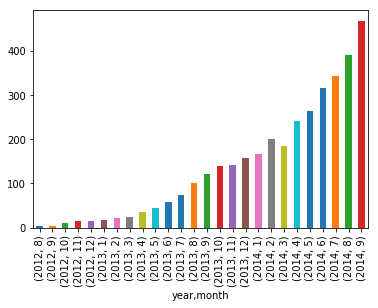

In [33]:
train.groupby(['year', 'month'])['Count'].mean().plot.bar()

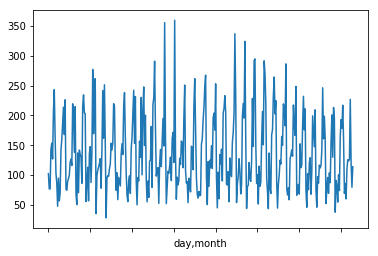

In [34]:
train.groupby(['day', 'month'])['Count'].mean().plot()

In [35]:
train.groupby(['day', 'month'])['Count'].mean().scatter()

AttributeError: 'Series' object has no attribute 'scatter'

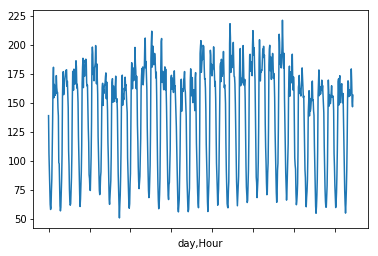

In [36]:
train.groupby(['day', 'Hour'])['Count'].mean().plot()

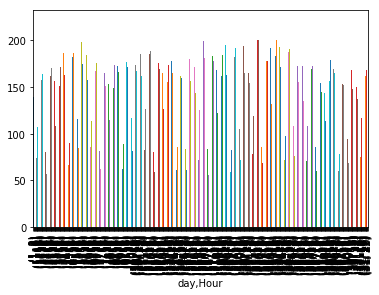

In [37]:
train.groupby(['day', 'Hour'])['Count'].mean().plot.bar()

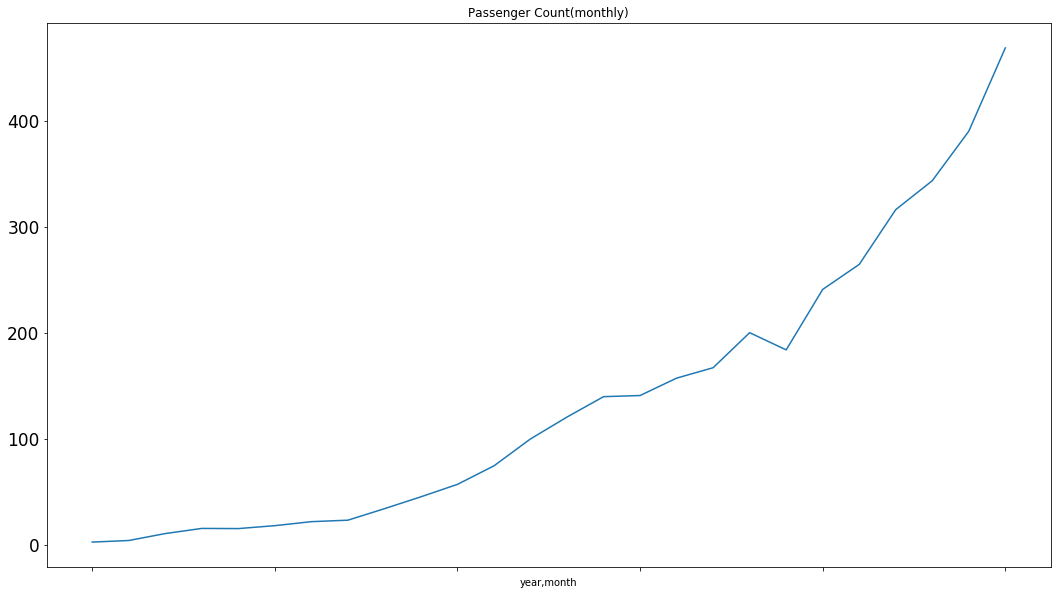

In [38]:
temp = train.groupby(['year', 'month'])['Count'].mean()
#temp.head()
temp.plot(figsize = (18, 10), title = "Passenger Count(monthly)", fontsize = 17)

In [39]:
train = train.drop('ID', 1)

In [40]:
train.Timestamp = pd.to_datetime(train.Datetime, format = "%d-%m-%Y %H:%M")
train.index = train.Timestamp

In [41]:
hourly = train.resample("H").mean()

In [42]:
hourly.head()

,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [43]:
monthly = train.resample("M").mean()

In [44]:
monthly.head()

,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581


In [45]:
daily = train.resample("D").mean()

In [46]:
daily.head()

,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [47]:
weekly = train.resample("W").mean()

In [48]:
weekly.head()

,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714


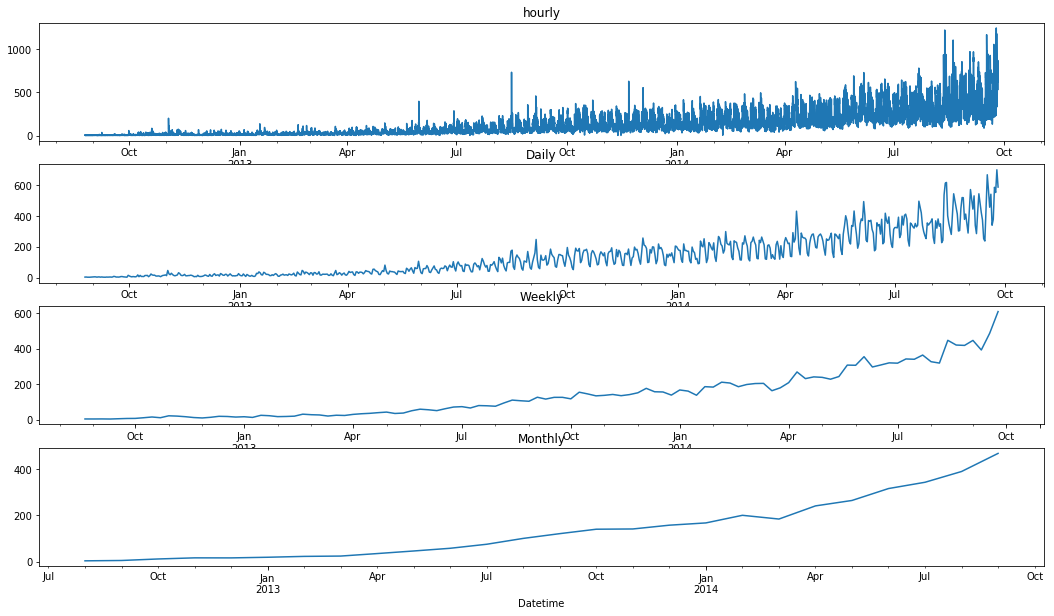

In [49]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (18, 10), title = "hourly", fontsize = 10, ax = axs[0])
daily.Count.plot(figsize = (18, 10), title = "Daily", fontsize = 10, ax = axs[1])
weekly.Count.plot(figsize = (18, 10), title = "Weekly", fontsize = 10, ax = axs[2])
monthly.Count.plot(figsize = (18, 10), title = "Monthly", fontsize = 10, ax = axs[3])

In [50]:
train.dtypes

Datetime     datetime64[ns]
Count                 int64
year                  int64
month                 int64
day                   int64
Hour                  int64
dayOfWeek             int64
weekend               int64
dtype: object

In [51]:
train.head()

,Datetime,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [52]:
train.Timestamp = pd.to_datetime(train.Datetime, format = "%d-%m-%Y %H:%M")
train.index = train.Timestamp

In [53]:
train.head()

,Datetime,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [54]:
daily_train = train.resample('D').mean()

In [55]:
daily_train.head()

,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [56]:
test.head()


,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [57]:
test.dtypes

ID                   int64
Datetime    datetime64[ns]
year                 int64
month                int64
day                  int64
Hour                 int64
dtype: object

In [58]:
test = test.drop('ID', 1)

In [59]:
test.Timestamp = pd.to_datetime(test.Datetime, format = "%d-%m-%Y %H:%M")
test.index = test.Timestamp

In [60]:
test.head()

,Datetime,year,month,day,Hour
Datetime,,,,,
2014-09-26 00:00:00,2014-09-26 00:00:00,2014,9,26,0
2014-09-26 01:00:00,2014-09-26 01:00:00,2014,9,26,1
2014-09-26 02:00:00,2014-09-26 02:00:00,2014,9,26,2
2014-09-26 03:00:00,2014-09-26 03:00:00,2014,9,26,3
2014-09-26 04:00:00,2014-09-26 04:00:00,2014,9,26,4


In [61]:
daily_test = test.resample('D').mean()

In [62]:
daily_test.head()

,year,month,day,Hour
Datetime,,,,
2014-09-26,2014.0,9.0,26.0,11.5
2014-09-27,2014.0,9.0,27.0,11.5
2014-09-28,2014.0,9.0,28.0,11.5
2014-09-29,2014.0,9.0,29.0,11.5
2014-09-30,2014.0,9.0,30.0,11.5


In [63]:
train.groupby(['month', 'year']).nunique()

Datetime  Count  year  month  day  Hour  dayOfWeek  weekend
month year                                                             
1     2013       744     36     1      1   31    24          7        2
      2014       744    156     1      1   31    24          7        2
2     2013       672     38     1      1   28    24          7        2
      2014       672    170     1      1   28    24          7        2
3     2013       744     43     1      1   31    24          7        2
      2014       744    172     1      1   31    24          7        2
4     2013       720     52     1      1   30    24          7        2
      2014       720    186     1      1   30    24          7        2
5     2013       744     68     1      1   31    24          7        2
      2014       744    215     1      1   31    24          7        2
6     2013       720     74     1      1   30    24          7        2
      2014       720    230     1      1   30    24          7        2
7     2013       744     89     1      1   31    24          7        2
      2014       744    246     1      1   31    24          7        2
8     2012       168      5     1      1    7    24          7        2
      2013       744    121     1      1   31    24          7        2
      2014       744    303     1      1   31    24          7        2
9     2012       720     16     1      1   30    24          7        2
      2013       720    125     1      1   30    24          7        2
      2014       600    312     1      1   25    24          7        2
10    2012       744     27     1      1   31    24          7        2
      2013       744    149     1      1   31    24          7        2
11    2012       720     38     1      1   30    24          7        2
      2013       720    144     1      1   30    24          7        2
12    2012       744     31     1      1   31    24          7        2
      2013       744    157     1      1   31    24          7        2

In [64]:
test['month'].nunique()

8

In [65]:
tarin.tail()

NameError: name 'tarin' is not defined

In [66]:
train.head()

,Datetime,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [67]:
Train=train.ix['2012-08-25':'2014-04-24']
valid=train.ix['2014-04-25':'2014-09-25']

In [68]:
test.dtypes

Datetime    datetime64[ns]
year                 int64
month                int64
day                  int64
Hour                 int64
dtype: object

In [69]:
valid.head()

,Datetime,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,,
2014-04-25 00:00:00,2014-04-25 00:00:00,202,2014,4,25,0,4,0
2014-04-25 01:00:00,2014-04-25 01:00:00,212,2014,4,25,1,4,0
2014-04-25 02:00:00,2014-04-25 02:00:00,178,2014,4,25,2,4,0
2014-04-25 03:00:00,2014-04-25 03:00:00,138,2014,4,25,3,4,0
2014-04-25 04:00:00,2014-04-25 04:00:00,132,2014,4,25,4,4,0


In [70]:
Train.tail()

,Datetime,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,,
2014-04-24 19:00:00,2014-04-24 19:00:00,320,2014,4,24,19,3,0
2014-04-24 20:00:00,2014-04-24 20:00:00,356,2014,4,24,20,3,0
2014-04-24 21:00:00,2014-04-24 21:00:00,304,2014,4,24,21,3,0
2014-04-24 22:00:00,2014-04-24 22:00:00,290,2014,4,24,22,3,0
2014-04-24 23:00:00,2014-04-24 23:00:00,342,2014,4,24,23,3,0


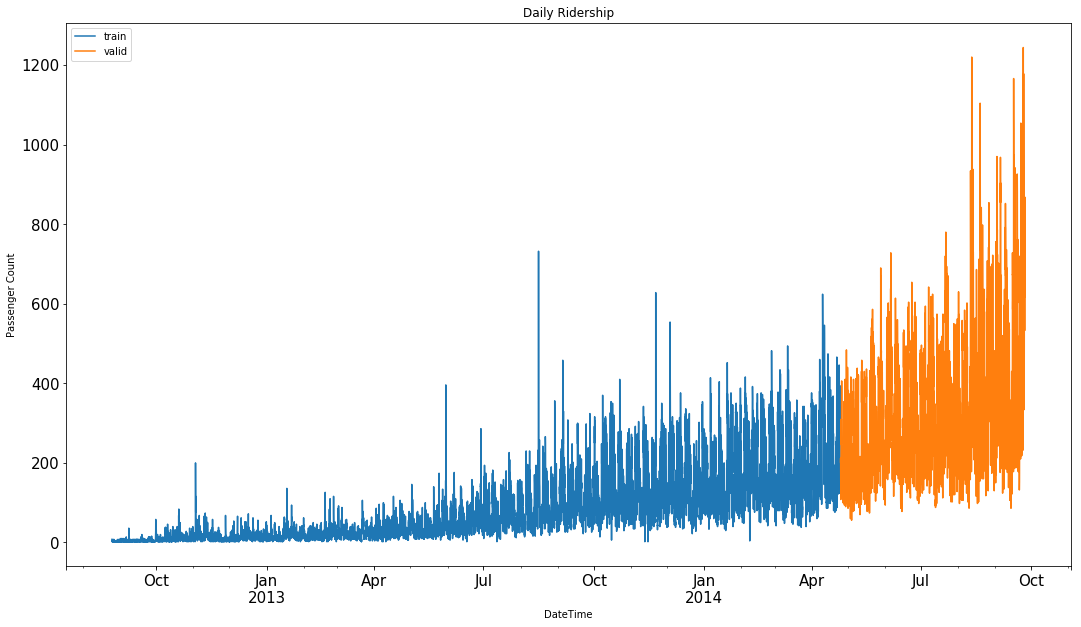

In [71]:
Train.Count.plot(figsize = (18, 10), fontsize = 15, label = "train", title = "Daily Ridership")
valid.Count.plot(figsize = (18, 10), fontsize = 15, label = "valid", title = "Daily Ridership")
plt.xlabel("DateTime")
plt.ylabel("Passenger Count")
plt.legend(loc = "best")
plt.show()

In [72]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd) - 1]
y_hat.dtypes

Datetime     datetime64[ns]
Count                 int64
year                  int64
month                 int64
day                   int64
Hour                  int64
dayOfWeek             int64
weekend               int64
naive                 int64
dtype: object

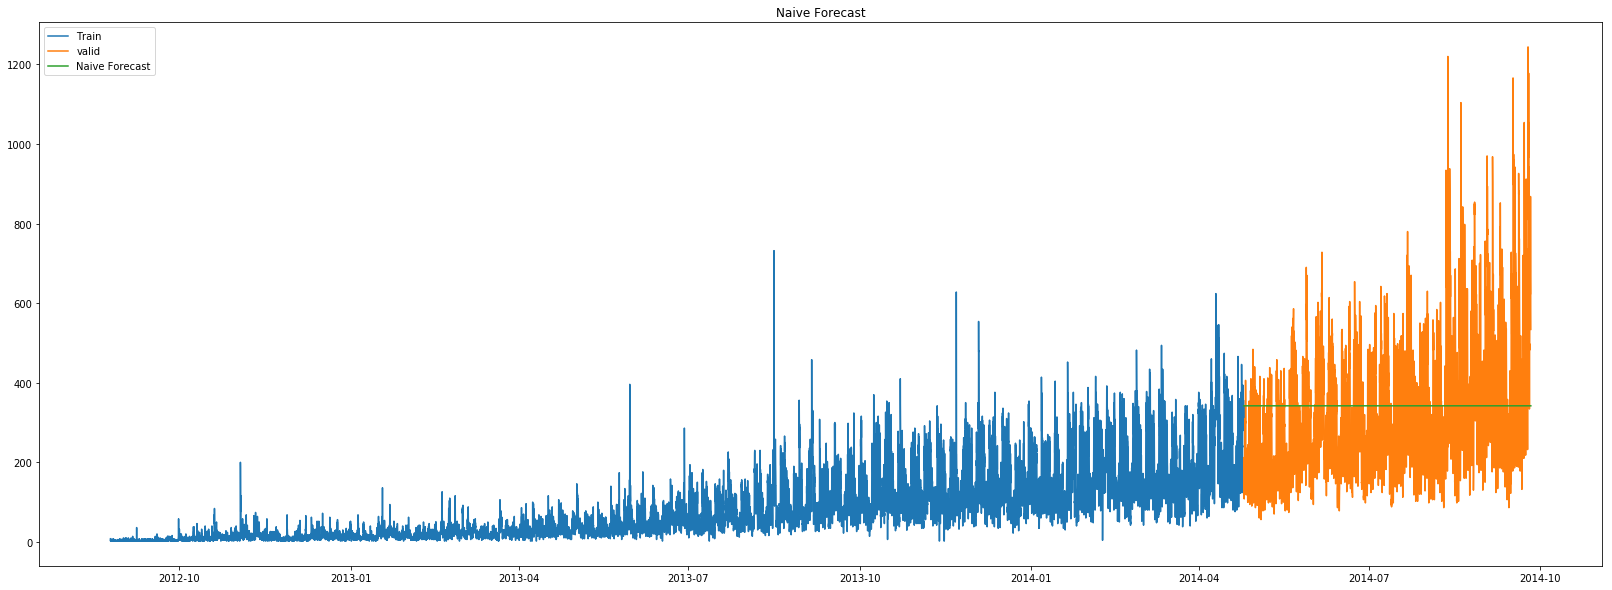

In [73]:
plt.figure(figsize = (28, 10))
plt.plot(Train.index, Train['Count'], label = "Train")
plt.plot(valid.index, valid['Count'], label = 'valid')
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive Forecast')
plt.legend(loc = "best")
plt.title("Naive Forecast")
plt.show()

In [74]:
import seaborn as sns

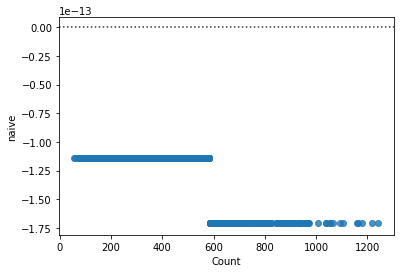

In [75]:
sns.residplot('Count', 'naive', y_hat)

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

172.525573736


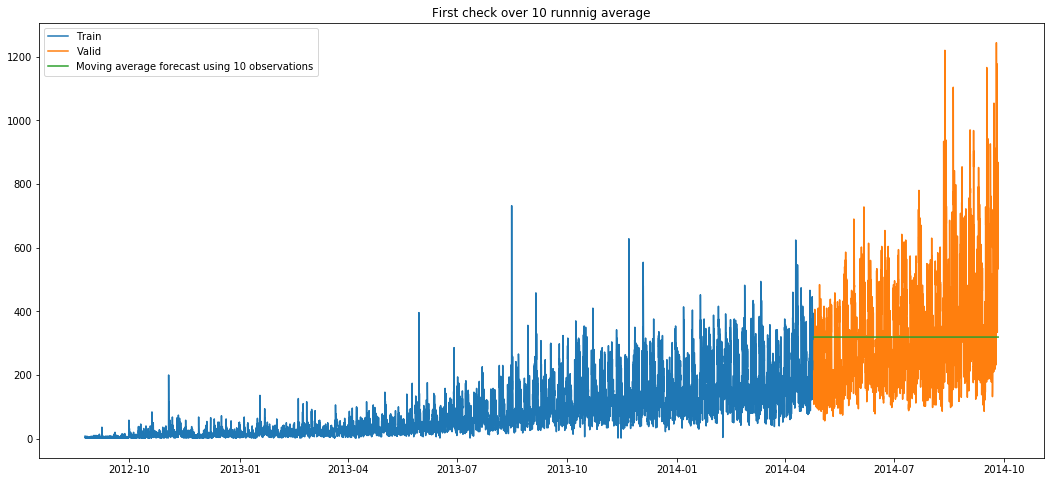

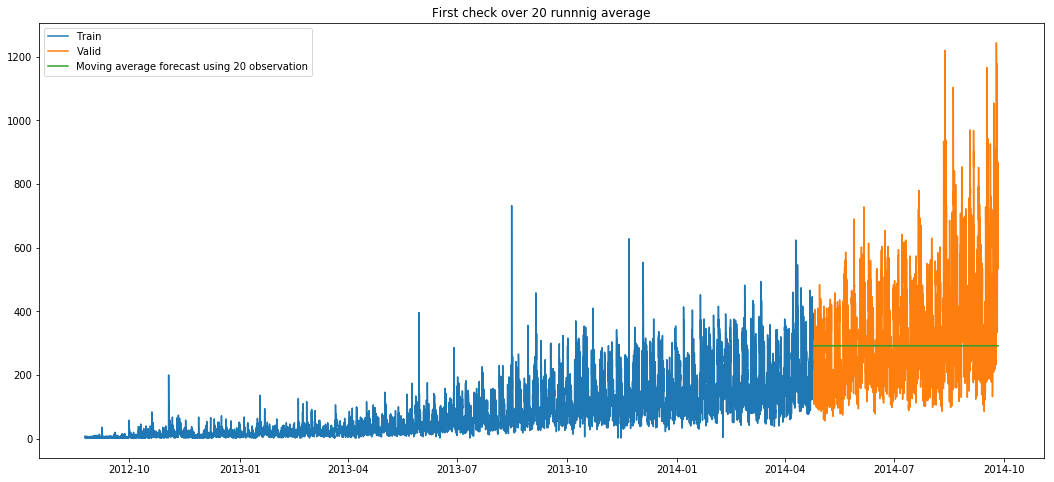

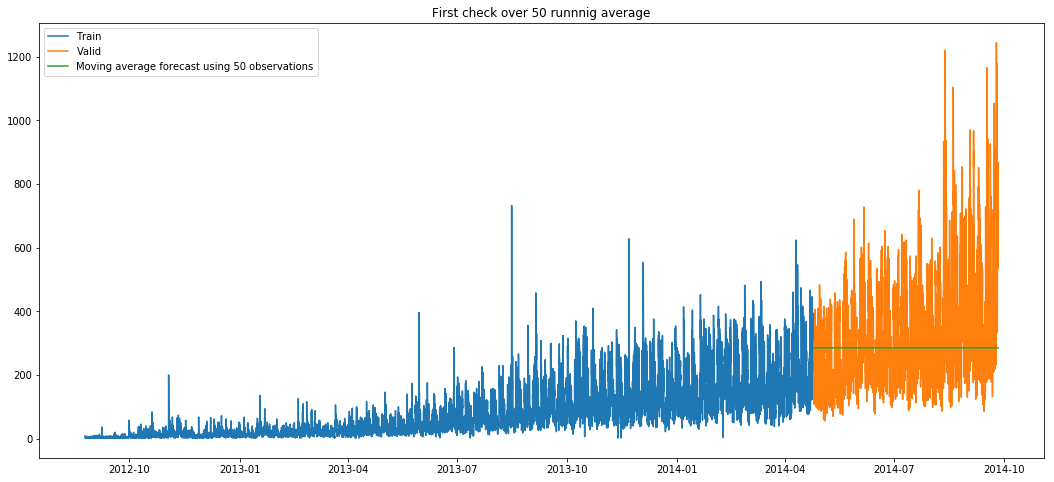

In [85]:
y_hat_avg = valid.copy()

y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (18, 8))
plt.title("First check over 10 runnnig average")
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = "Moving average forecast using 10 observations")
plt.legend(loc = "best")
plt.show()


y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (18, 8))
plt.title("First check over 20 runnnig average")
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = "Moving average forecast using 20 observation")
plt.legend(loc = "best")
plt.show()


y_hat_avg  = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (18, 8))
plt.title("First check over 50 runnnig average")
plt.plot(Train['Count'], label = "Train")
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = "Moving average forecast using 50 observations")
plt.legend(loc = "best")
plt.show()

In [78]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
rms

183.4907530373573

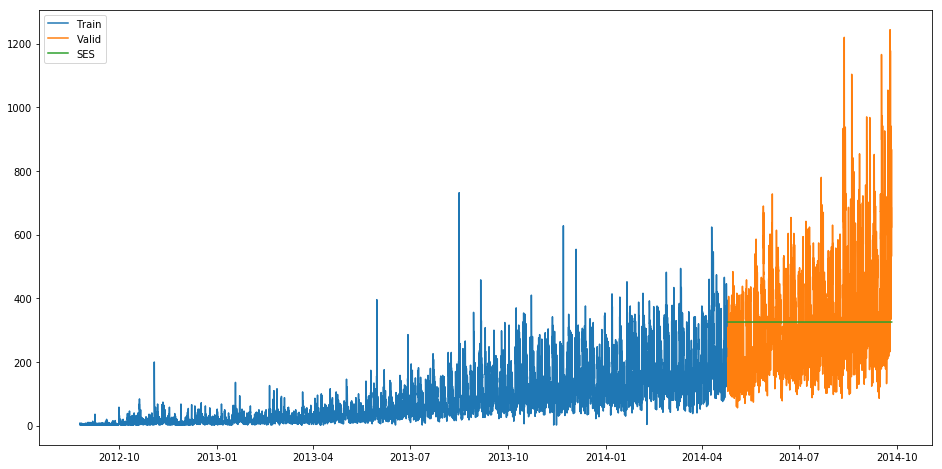

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg_stats = valid.copy()

fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6, optimized = True)
y_hat_avg_stats['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16, 8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg_stats['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [80]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg_stats.SES))
rms

173.8664553781106

C:\Users\garima.misra\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


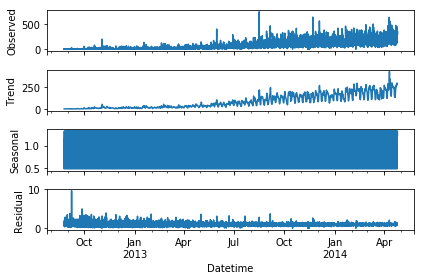

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
#plt.figure(figsize=(20, 12))
result = seasonal_decompose(Train['Count'], model="multiplicative").plot()
#plt.plot(result)
result.show()

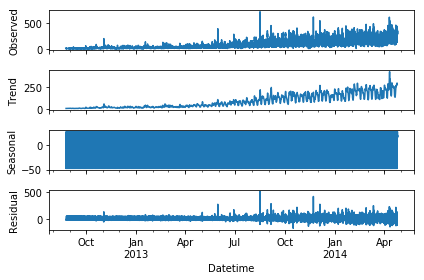

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Train.Count, model='additive').plot()
plt.show()

C:\Users\garima.misra\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


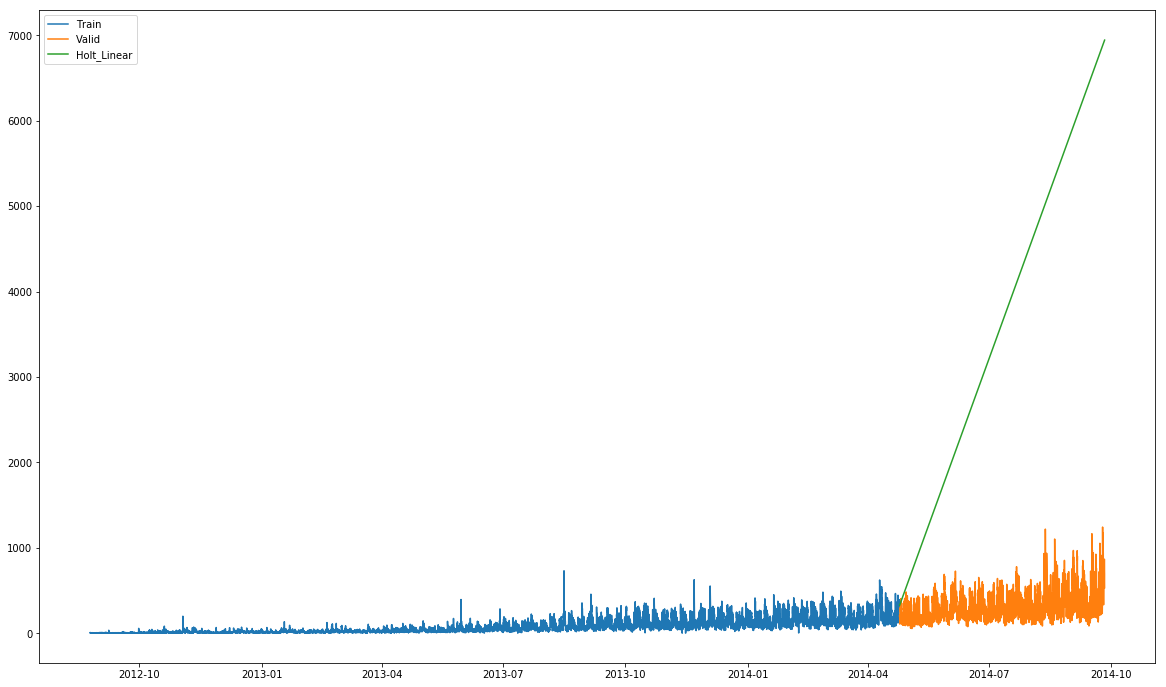

In [84]:
y_hat_avg_holt = valid.copy()

fit1 = Holt(Train.Count).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg_holt['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize = (20, 12))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg_holt['Holt_linear'], label="Holt_Linear")
plt.legend(loc="best")
plt.show()